In [1]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath('..'))

In [2]:
from scripts.ab_testing import load_data , detecting_categorical_outliers,handle_catagorical_outliers, ab_test_provinces , ab_test_zipcodes , ab_test_zipcode_margin , ab_test_gender , preprocess_data ,report_results , visualize_province_risk ,visualize_zipcode_risk , visualize_zipcode_margin , visualize_gender_risk  

In [3]:
path = '../data/data.csv'

In [4]:
data = load_data(path)

c:\Users\bekib\Desktop\10ACADAMY\WEEK-THREE\week-3\scripts\ab_testing.py:10: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filepath)


In [5]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [6]:
preprocess_data(data)

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle

In [7]:
data.shape

(990562, 52)

In [8]:
detecting_categorical_outliers(data,'Gender')

array(['Not specified', 'Male', 'Female'], dtype=object)

In [9]:
valid_values = ['Male','Female','Not specified']
output , data1 = handle_catagorical_outliers(data,'Gender',valid_values)

In [10]:
data1['Gender'].unique()

array(['Not specified', 'Male', 'Female'], dtype=object)

In [11]:
data1.shape

(990562, 52)

In [12]:
f_stat,p_value = ab_test_provinces(data1)

In [13]:
f_stat

np.float64(5.956030912714761)

In [14]:
p_value

np.float64(1.1538305337952927e-07)

In [15]:
report_results(p_value)

'Reject the null hypothesis (statistically significant)'

In [16]:
fstat_zipcode , p_value_zipcode = ab_test_zipcodes(data1)

In [17]:
fstat_zipcode

np.float64(0.9739454470280359)

In [18]:
p_value_zipcode

np.float64(0.7044098897349418)

In [19]:
report_results(p_value_zipcode)

'Fail to reject the null hypothesis (not statistically significant)'

In [20]:
f_stat_margin , p_value_zipcode_margin = ab_test_zipcode_margin(data1) 

In [21]:
f_stat_margin

np.float64(10.572625984179934)

In [22]:
p_value_zipcode_margin

np.float64(0.0)

In [23]:
report_results(p_value_zipcode_margin)

'Reject the null hypothesis (statistically significant)'

In [24]:
t_test_gender ,p_value_gender =  ab_test_gender(data1)

In [25]:
t_test_gender

np.float64(-0.24803623812388725)

In [26]:
p_value_gender

np.float64(0.8041073961270343)

In [27]:
report_results(p_value_gender)

'Fail to reject the null hypothesis (not statistically significant)'

In [28]:
data1.to_csv('../data/data.csv',index=False)

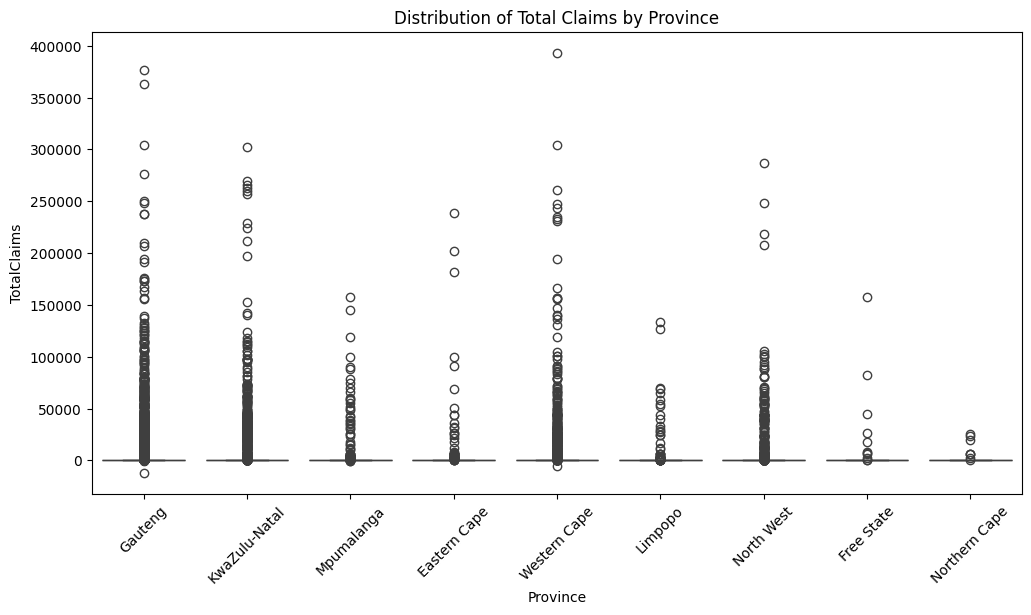

In [29]:
visualize_province_risk(data1)


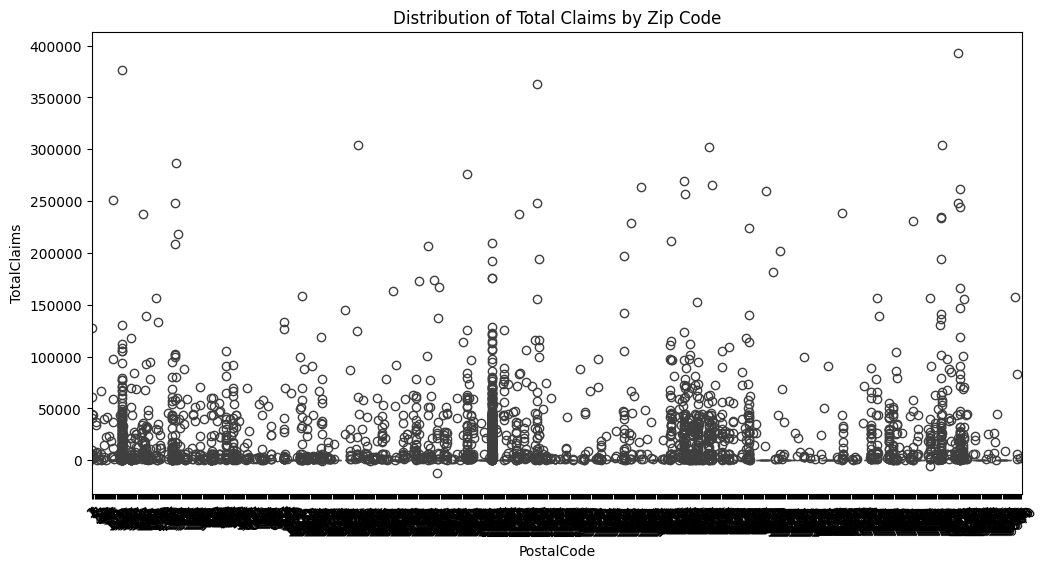

In [30]:
visualize_zipcode_risk(data1)

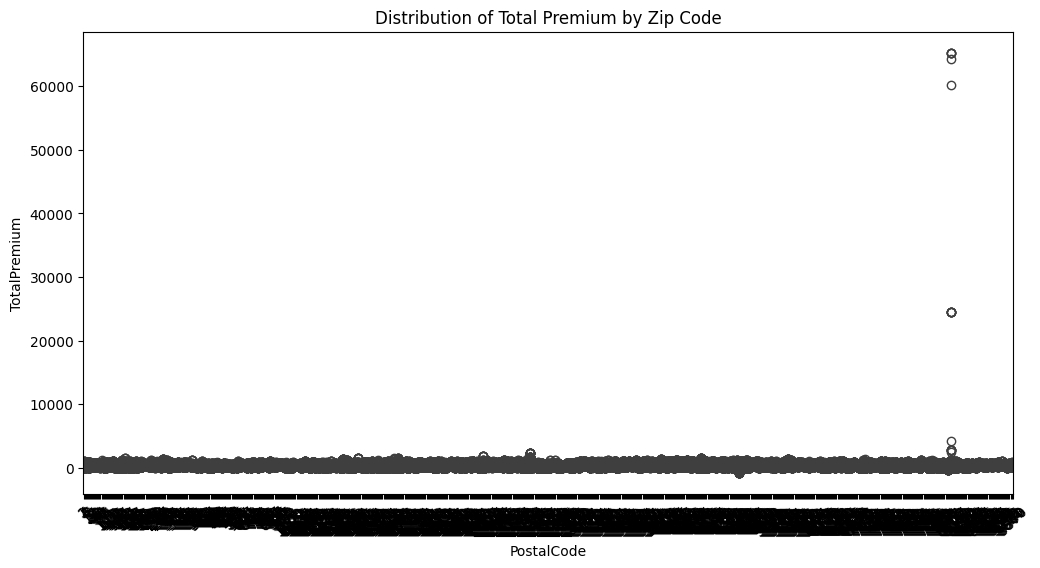

In [31]:
visualize_zipcode_margin(data1)

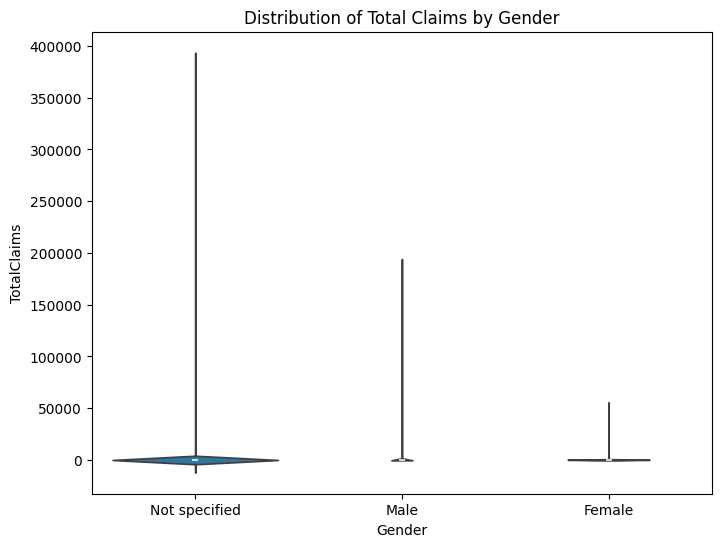

In [32]:
visualize_gender_risk(data1)